In [1]:
from twobox import *
import pickle
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
def twoboxGenerate(parameters, sample_length, sample_number):
    #datestring = datetime.strftime(datetime.now(), '%Y-%m-%d-%H-%M-%S')
    datestring = datetime.strftime(datetime.now(), '%m%d%Y(%H%M)')   # current time used to set file name


    print("\nSet the parameters of the model... \n")
    ### Set all related parameters
    discount = 0.99  # temporal discount , used to solve the MDP with value iteration

    nq = 5  # number of belief states per box
    nr = 2  # number of reward states
    nl = 3  # number of location states
    na = 5
    
#     beta = parameters[0]
#     gamma1 = parameters[1]
#     gamma2 = parameters[2]
#     delta =  parameters[3]
#     direct = parameters[4]
#     epsilon1 = parameters[5]
#     epsilon2 = parameters[6]
#     rho = parameters[7]
#     # State rewards
#     Reward = 1 
#     groom = parameters[8]
#     # Action costs
#     travelCost = parameters[9]
#     pushButtonCost = parameters[10]
    
    beta = 0     # available food dropped back into box after button press
    gamma1 = parameters[0]   # reward becomes available in box 1
    gamma2 = parameters[1]   # reward becomes available in box 2
    delta = 0    # animal trips, doesn't go to target location
    direct = 0   # animal goes right to target, skipping location 0
    epsilon1 = parameters[2] # available food disappears from box 1
    epsilon2 = parameters[3] # available food disappears from box 2
    rho = 1      # food in mouth is consumed
    # State rewards
    Reward = 1   # reward per time step with food in mouth
    groom = parameters[4]     # location 0 reward
    # Action costs
    travelCost = parameters[5]
    pushButtonCost = parameters[6]
        

#     beta = 0.001 * 0  # .001     # available food dropped back into box after button press
#     gamma1 = 1/25   #.3   #.1     # reward becomes available in box 1
#     gamma2 = 1/15   #.001   #.1  # .1 / scale   # reward becomes available in box 2
#     delta = 0.001 * 0  # .001    # animal trips, doesn't go to target location
#     direct = 0.001 * 0  # .001   # animal goes right to target, skipping location 0
#     epsilon1 = 0  #.1   #.01  # available food disappears from box 1
#     epsilon2 = 0  #.999   #.01  # available food disappears from box 2
#     rho = 1           # .999      # food in mouth is consumed
#     # eta = .0001        # random diffusion of belief

#     # State rewards
#     Reward = 1 #3  # reward per time step with food in mouth
#     groom = 0   #0.01   #0.05  # 0.1     # location 0 reward

#     # Action costs
#     travelCost = 0.1  # 0.1
#     pushButtonCost = .2  # 0.1
    

    # parameters = [beta, gamma1, gamma2, delta, direct, epsilon1, epsilon2,
    #               rho, Groom, travelCost, pushButtonCost]
    #parameters = [gamma1, gamma2, epsilon1, epsilon2,
    #              groom, travelCost, pushButtonCost]

    ### Solving the MDP problem with given parameters

    print("Solving the belief MDP...")
    twobox = twoboxMDP(discount, nq, nr, na, nl, parameters)
    twobox.setupMDP()
    twobox.solveMDP_sfm(initial_value = 0)

    fig  = plt.figure(figsize = (20, 2))
    ax = fig.add_subplot(111)
    policyfig =  ax.imshow(twobox.softpolicy)
    fig.colorbar(policyfig)
    plt.show()
    #print np.max(np.abs(Q_sfm - twobox.Qsfm))
    #print np.max(softpolicy - twobox.softpolicy)


    ### Gnerate data"""
    print("Generate data based on the true model...")
    T = sample_length
    N = sample_number
    twoboxdata = twoboxMDPdata(discount, nq, nr, na, nl, parameters, T, N)
    twoboxdata.dataGenerate_sfm(belief1Initial=0, rewInitial=0, belief2Initial=0, locationInitial=0)
    #twoboxdata.dataGenerate_op(belief1Initial=0, rewInitial=0, belief2Initial=0, locationInitial=0)
    hybrid = twoboxdata.hybrid
    action = twoboxdata.action
    location = twoboxdata.location
    belief1 = twoboxdata.belief1
    belief2 = twoboxdata.belief2
    reward = twoboxdata.reward
    trueState1 = twoboxdata.trueState1
    trueState2 = twoboxdata.trueState2

    # sampleNum * sampleTime * dim of observations(=3 here, action, reward, location)
    # organize data
    obsN = np.dstack([action, reward, location])  # includes the action and the observable states
    latN = np.dstack([belief1, belief2])
    truthN = np.dstack([trueState1, trueState2])
    #dataN = np.dstack([obsN, latN, truthN])

#     ### write data to file
#     data_dict = {'observations': obsN,
#                  'beliefs': latN,
#                  'trueStates': truthN,
#                  'allData': dataN}
#     data_output = open(datestring + '_dataN_twobox' + '.pkl', 'wb')
#     pickle.dump(data_dict, data_output)
#     data_output.close()

#     ### write all model parameters to file
#     para_dict = {'discount': discount,
#                  'nq': nq,
#                  'nr': nr,
#                  'nl': nl,
#                  'na': na,
#                  'foodDrop': beta,
#                  'appRate1': gamma1,
#                  'appRate2': gamma2,
#                  'disappRate1': epsilon1,
#                  'disappRate2': epsilon2,
#                  'consume': rho,
#                  'reward': Reward,
#                  'groom': groom,
#                  'travelCost': travelCost,
#                  'pushButtonCost': pushButtonCost
#                  }
#     para_output = open(datestring + '_para_twobox' + '.pkl', 'wb')
#     pickle.dump(para_dict, para_output)
#     para_output.close()

#     pkl_file1 = open(datestring + '_para_twobox' + '.pkl', 'rb')
#     para_pkl = pickle.load(pkl_file1)
#     pkl_file1.close()

#    print('Data stored in files' )

    return obsN, latN, truthN

In [59]:
#parameters = [gamma1, gamma2, epsilon1, epsilon2,
#              groom, travelCost, pushButtonCost]
gamma1 = 0.1
gamma2 = 0.1
epsilon1 = 0.01
epsilon2 = 0.01
groom = 0.05
travelCost = 0.2
pushButtonCost = 0.3
parameters = [gamma1, gamma2, epsilon1, epsilon2,
              groom, travelCost, pushButtonCost]

#parameters = [0.1, 0.1, 0.01, 0.01, 
#              0.05, 0.2, 0.3]
parameters   

[0.1, 0.1, 0.01, 0.01, 0.05, 0.2, 0.3]


Set the parameters of the model... 

Solving the belief MDP...


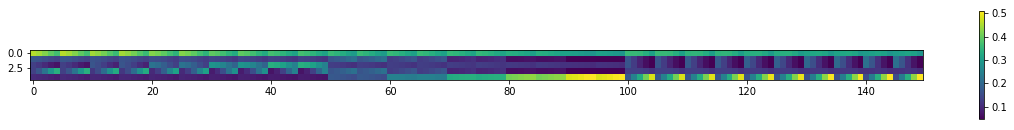

Generate data based on the true model...


In [4]:
obsN, latN, truthN = twoboxGenerate(parameters, sample_length = 5000, sample_number = 1)

In [5]:
latN[0]

array([[0, 0],
       [1, 1],
       [2, 2],
       ...,
       [2, 1],
       [2, 2],
       [0, 3]])

# EM

In [6]:
discount = 0.99  # temporal discount , used to solve the MDP with value iteration

nq = 5  # number of belief states per box
nr = 2  # number of reward states
nl = 3  # number of location states
na = 5



In [7]:
sampleIndex = [0]
NN = len(sampleIndex)

In [8]:
parameters

[0.1, 0.1, 0.01, 0.01, 0.05, 0.2, 0.3]

In [9]:
parameters_iniSet = [[0.05,0.05,0.15,0.15,0.03,0.25,0.33]]
E_MAX_ITER = 300       # 100    # maximum number of iterations of E-step
GD_THRESHOLD = 0.015   # 0.01      # stopping criteria of M-step (gradient descent)
E_EPS = 10 ** -8                  # stopping criteria of E-step
M_LR_INI = 5 * 10 ** -5           # initial learning rate in the gradient descent step
LR_DEC =  3                       # number of times that the learning rate can be reduced


In [10]:
#### EM algorithm for parameter estimation
print("\nEM algorithm begins ...")
# NN denotes multiple data set, and MM denotes multiple initial points
NN_MM_para_old_traj = []

NN_MM_para_new_traj = []
NN_MM_log_likelihoods_old = []
NN_MM_log_likelihoods_new = []
NN_MM_log_likelihoods_com_old = []    # old posterior, old parameters
NN_MM_log_likelihoods_com_new = []    # old posterior, new parameters
NN_MM_latent_entropies = []

NN_likelihoods = []

for nn in range(NN):

    print("\nFor the", sampleIndex[nn] + 1, "-th set of data:")

    ##############################################################
    # Compute likelihood
    lat = latN[sampleIndex[nn]]
    obs = obsN[sampleIndex[nn], :, :]

    MM = len(parameters_iniSet)

    MM_para_old_traj = []
    MM_para_new_traj = []
    MM_log_likelihoods_old = []
    MM_log_likelihoods_new = []
    MM_log_likelihoods_com_old = []    # old posterior, old parameters
    MM_log_likelihoods_com_new = []    # old posterior, new parameters
    MM_latent_entropies = []

    for mm in range(MM):
        parameters_old = np.copy(parameters_iniSet[mm])

        print("\n", mm + 1, "-th initial estimation:", parameters_old)

        itermax = E_MAX_ITER #100  # iteration number for the EM algorithm
        eps = E_EPS   # Stopping criteria for E-step in EM algorithm

        para_old_traj = []
        para_new_traj = []

        log_likelihoods_old = []
        log_likelihoods_new = []
        log_likelihoods_com_old = []  # old posterior, old parameters
        log_likelihoods_com_new = []  # old posterior, new parameters
        latent_entropies = []

        count_E = 0
        while count_E < itermax:

            print("\n The", count_E + 1, "-th iteration of the EM(G) algorithm")

            if count_E == 0:
                parameters_old = np.copy(parameters_iniSet[mm])
            else:
                parameters_old = np.copy(parameters_new)  # update parameters

            para_old_traj.append(parameters_old)

            ##########  E-step ##########

            ## Use old parameters to estimate posterior

            #twoboxGra = twoboxMDPder(discount, nq, nr, na, nl, parameters_old, vinitial)
            twoboxGra = twoboxMDPder(discount, nq, nr, na, nl, parameters_old)
            ThA_old = twoboxGra.ThA
            softpolicy_old = twoboxGra.softpolicy
            pi = np.ones(nq * nq) / nq / nq
            twoHMM = HMMtwobox(ThA_old, softpolicy_old, pi)

            ## Calculate likelihood of observed and complete date, and entropy of the latent sequence
            complete_likelihood_old = twoHMM.computeQaux(obs, ThA_old, softpolicy_old)
            latent_entropy = twoHMM.latent_entr(obs)
            log_likelihood = complete_likelihood_old + latent_entropy

            log_likelihoods_com_old.append(complete_likelihood_old)
            latent_entropies.append(latent_entropy)
            log_likelihoods_old.append(log_likelihood)

            print(parameters_old)
            print(complete_likelihood_old)
            print(log_likelihood)

            ## Check convergence
            if len(log_likelihoods_old) >= 2 and np.abs(log_likelihood - log_likelihoods_old[-2]) < eps:
                print("EM has converged!")
                break

            ##########  M(G)-step ##########

            count_M = 0
            vinitial = 0
            para_new_traj.append([])
            log_likelihoods_com_new.append([])
            log_likelihoods_new.append([])
            
            learnrate_ini = M_LR_INI
            learnrate = learnrate_ini

            # Start the gradient descent from the old parameters
            parameters_new = np.copy(parameters_old)
            complete_likelihood_new = complete_likelihood_old
            log_likelihood = complete_likelihood_new + latent_entropy

            para_new_traj[count_E].append(parameters_new)
            log_likelihoods_com_new[count_E].append(complete_likelihood_new)
            log_likelihoods_new[count_E].append(log_likelihood)

            print("    M-step")
            print("     ", parameters_new)
            print("     ", complete_likelihood_new)
            print("     ", log_likelihood)

            while True:
                
                derivative_value = twoboxGra.dQauxdpara(obs, parameters_new, vinitial)  
                # vinitial is value from previous iteration, this is for computational efficiency
                para_temp = parameters_new + learnrate * np.array(derivative_value[:-1])
                vinitial = derivative_value[-1]  # value iteration starts with value from previous iteration

#                 if parameterMain_dict['optimizer'] == 'GD':
#                     ## standard gradient descent algorithm
#                     #start = timeit.timeit()
#                     derivative_value = twoboxGra.dQauxdpara(obs, parameters_new,
#                                                             vinitial)  # vinitial is value from previous iteration, this is for computational efficiency
#                     #print(timeit.timeit() - start)
#                     para_temp = parameters_new + learnrate * np.array(derivative_value[:-1])
#                     vinitial = derivative_value[-1]  # value iteration starts with value from previous iteration

#                 elif parameterMain_dict['optimizer'] == 'PGD':
#                     ## Go the potential next point with PROJECTED gradient descent
#                     parameters_new_pro = - np.log(1 / parameters_new - 1)  # projected back onto the whole real axis
#                     sig_deri = np.exp(- parameters_new_pro) / (np.exp(-parameters_new_pro) + 1) ** 2
#                     start = timeit.timeit()
#                     derivative_value = twoboxGra.dQauxdpara(obs, parameters_new, vinitial)
#                     print(timeit.timeit() - start)
#                     para_temp = parameters_new_pro + learnrate * np.array(derivative_value[:-1]) * sig_deri
#                     para_temp = 1 / (1 + np.exp(- para_temp))  # projected onto [0,1]
#                     vinitial = derivative_value[-1]

                ## Check the ECDLL (old posterior, new parameters)
                twobox_new = twoboxMDP(discount, nq, nr, na, nl, para_temp)
                twobox_new.setupMDP()
                twobox_new.solveMDP_sfm()
                ThA_new = twobox_new.ThA
                softpolicy_new = twobox_new.softpolicy
                complete_likelihood_new_temp = twoHMM.computeQaux(obs, ThA_new, softpolicy_new)

                print("         ", para_temp)
                print("         ", complete_likelihood_new_temp)

                ## Update the parameter if the ECDLL can be improved
                if complete_likelihood_new_temp > complete_likelihood_new + GD_THRESHOLD:
                    parameters_new = np.copy(para_temp)
                    complete_likelihood_new = complete_likelihood_new_temp
                    log_likelihood = complete_likelihood_new + latent_entropy

                    para_new_traj[count_E].append(parameters_new)
                    log_likelihoods_com_new[count_E].append(complete_likelihood_new)
                    log_likelihoods_new[count_E].append(log_likelihood)

                    print("     ", parameters_new)
                    print("     ", complete_likelihood_new)
                    print("     ", log_likelihood)

                    count_M += 1
                else:
                    learnrate /= 2
                    if learnrate < learnrate_ini / (2 ** LR_DEC):
                        break

            count_E += 1

        MM_para_old_traj.append(para_old_traj)  # parameter trajectories for a particular set of data
        MM_para_new_traj.append(para_new_traj)
        MM_log_likelihoods_old.append(log_likelihoods_old)  # likelihood trajectories for a particular set of data
        MM_log_likelihoods_new.append(log_likelihoods_new)
        MM_log_likelihoods_com_old.append(log_likelihoods_com_old)    # old posterior, old parameters
        MM_log_likelihoods_com_new.append(log_likelihoods_com_new)    # old posterior, new parameters
        MM_latent_entropies.append(latent_entropies)

    NN_MM_para_old_traj.append(MM_para_old_traj)  # parameter trajectories for all data
    NN_MM_para_new_traj.append(MM_para_new_traj)
    NN_MM_log_likelihoods_old.append(MM_log_likelihoods_old)  # likelihood trajectories for
    NN_MM_log_likelihoods_new.append(MM_log_likelihoods_new)
    NN_MM_log_likelihoods_com_old.append(MM_log_likelihoods_com_old)   # old posterior, old parameters
    NN_MM_log_likelihoods_com_new.append(MM_log_likelihoods_com_new)   # old posterior, new parameters
    NN_MM_latent_entropies.append(MM_latent_entropies)



EM algorithm begins ...

For the 1 -th set of data:

 1 -th initial estimation: [0.05 0.05 0.15 0.15 0.03 0.25 0.33]

 The 1 -th iteration of the EM(G) algorithm
[0.05 0.05 0.15 0.15 0.03 0.25 0.33]
-15458.916261694667
-7864.485527420475
    M-step
      [0.05 0.05 0.15 0.15 0.03 0.25 0.33]
      -15458.916261694667
      -7864.485527420475
          [ 0.14359132  0.15514848  0.09345743  0.09005269 -0.14537528  0.19054435
  0.2970466 ]
          -17779.938112828117
          [ 0.09679566  0.10257424  0.12172871  0.12002635 -0.05768764  0.22027217
  0.3135233 ]
          -16039.51075584018
          [ 0.07339783  0.07628712  0.13586436  0.13501317 -0.01384382  0.23513609
  0.32176165]
          -15531.088332875168
          [0.06169892 0.06314356 0.14293218 0.14250659 0.00807809 0.24256804
 0.32588082]
          -15419.42645749272
      [0.06169892 0.06314356 0.14293218 0.14250659 0.00807809 0.24256804
 0.32588082]
      -15419.42645749272
      -7824.995723218528
          [0.06076996

          [0.05434584 0.05661825 0.12504848 0.12655212 0.01595689 0.20034203
 0.31420028]
          -15372.682366072775
      [0.05434584 0.05661825 0.12504848 0.12655212 0.01595689 0.20034203
 0.31420028]
      -15372.682366072775
      -7778.251631798583
          [0.05427344 0.05655435 0.1248935  0.12641506 0.01598465 0.20025884
 0.31395045]
          -15372.666184387039
      [0.05427344 0.05655435 0.1248935  0.12641506 0.01598465 0.20025884
 0.31395045]
      -15372.666184387039
      -7778.235450112847
          [0.05420577 0.05649462 0.12474866 0.12628697 0.01601141 0.20018261
 0.31371495]
          -15372.652101146745

 The 2 -th iteration of the EM(G) algorithm
[0.05427344 0.05655435 0.1248935  0.12641506 0.01598465 0.20025884
 0.31395045]
-15576.018500180782
-7751.519848458442
    M-step
      [0.05427344 0.05655435 0.1248935  0.12641506 0.01598465 0.20025884
 0.31395045]
      -15576.018500180782
      -7751.519848458442
          [0.11682686 0.12539329 0.07918507 0.08025584

          [0.06223998 0.06777091 0.08782402 0.09357884 0.01997433 0.20324289
 0.32534638]
          -15688.845413505942

 The 4 -th iteration of the EM(G) algorithm
[0.0622735  0.06778063 0.08790502 0.09364581 0.02001169 0.20320156
 0.32525496]
-15802.593133420252
-7664.92313954653
    M-step
      [0.0622735  0.06778063 0.08790502 0.09364581 0.02001169 0.20320156
 0.32525496]
      -15802.593133420252
      -7664.92313954653
          [0.11245685 0.1214766  0.0457585  0.05304723 0.02972957 0.20256267
 0.33154724]
          -16174.494338701283
          [0.08736518 0.09462862 0.06683176 0.07334652 0.02487063 0.20288212
 0.3284011 ]
          -15848.450445916133
          [0.07481934 0.08120462 0.07736839 0.08349617 0.02244116 0.20304184
 0.32682803]
          -15791.36415081908
      [0.07481934 0.08120462 0.07736839 0.08349617 0.02244116 0.20304184
 0.32682803]
      -15791.36415081908
      -7653.6941569453575
          [0.06625347 0.07187309 0.07975334 0.08672854 0.02442786 0.203045

          [0.07521341 0.08513068 0.05187549 0.06302498 0.02468688 0.20778743
 0.3429767 ]
          -15881.333736445795
      [0.07521341 0.08513068 0.05187549 0.06302498 0.02468688 0.20778743
 0.3429767 ]
      -15881.333736445795
      -7599.808672308827
          [0.07361917 0.0823693  0.05200707 0.06412639 0.02579725 0.2078111
 0.34397954]
          -15881.069293347213
      [0.07361917 0.0823693  0.05200707 0.06412639 0.02579725 0.2078111
 0.34397954]
      -15881.069293347213
      -7599.544229210245
          [0.07388712 0.0839345  0.05125388 0.06286177 0.02484041 0.20819275
 0.34440993]
          -15880.938078978706
      [0.07388712 0.0839345  0.05125388 0.06286177 0.02484041 0.20819275
 0.34440993]
      -15880.938078978706
      -7599.413014841739
          [0.07349989 0.08260898 0.05103374 0.06336962 0.02522957 0.20828712
 0.34508034]
          -15880.870337182387
      [0.07349989 0.08260898 0.05103374 0.06336962 0.02522957 0.20828712
 0.34508034]
      -15880.870337182387

          [0.09986709 0.11635613 0.01557667 0.03132789 0.03172852 0.21127152
 0.36217874]
          -15956.756776573286
          [0.08947432 0.10398685 0.02564245 0.04130557 0.02961333 0.21125368
 0.36015464]
          -15894.12729113758
          [0.08427794 0.09780221 0.03067534 0.0462944  0.02855573 0.21124476
 0.35914259]
          -15883.28558840962
      [0.08427794 0.09780221 0.03067534 0.0462944  0.02855573 0.21124476
 0.35914259]
      -15883.28558840962
      -7566.253495525087
          [0.08148939 0.09428202 0.03191158 0.04845819 0.02978089 0.21124103
 0.36022268]
          -15882.734090813181
      [0.08148939 0.09428202 0.03191158 0.04845819 0.02978089 0.21124103
 0.36022268]
      -15882.734090813181
      -7565.701997928647
          [0.08236859 0.0963054  0.03081439 0.04697472 0.02863855 0.21162789
 0.3606537 ]
          -15882.527468603726
      [0.08236859 0.0963054  0.03081439 0.04697472 0.02863855 0.21162789
 0.3606537 ]
      -15882.527468603726
      -7565.49537

          [0.08893024 0.10590426 0.01959237 0.03898516 0.03117735 0.2136167
 0.37217786]
          -15833.806699592438
      [0.08893024 0.10590426 0.01959237 0.03898516 0.03117735 0.2136167
 0.37217786]
      -15833.806699592438
      -7553.131523787146
          [0.08745115 0.10402971 0.02041206 0.0404821  0.0320041  0.21361179
 0.37298395]
          -15833.604810260393
      [0.08745115 0.10402971 0.02041206 0.0404821  0.0320041  0.21361179
 0.37298395]
      -15833.604810260393
      -7552.9296344551
          [0.08793499 0.10526798 0.01986696 0.03969304 0.03134241 0.21384797
 0.37338005]
          -15833.52580783016
      [0.08793499 0.10526798 0.01986696 0.03969304 0.03134241 0.21384797
 0.37338005]
      -15833.52580783016
      -7552.850632024867
          [0.08765413 0.10455957 0.01993912 0.0402827  0.0315861  0.21390403
 0.37393695]
          -15833.487763038946
      [0.08765413 0.10455957 0.01993912 0.0402827  0.0315861  0.21390403
 0.37393695]
      -15833.487763038946
   

[0.09215899 0.11209985 0.01414009 0.03696504 0.03317302 0.21522502
 0.38272723]
-15772.776935585714
-7547.357894783552
    M-step
      [0.09215899 0.11209985 0.01414009 0.03696504 0.03317302 0.21522502
 0.38272723]
      -15772.776935585714
      -7547.357894783552
          [0.09928055 0.1207034  0.00778875 0.03120062 0.03482495 0.21528327
 0.38504341]
          -15779.9408665195
          [0.09571977 0.11640162 0.01096442 0.03408283 0.03399898 0.21525415
 0.38388532]
          -15773.526142482555
          [0.09393938 0.11425074 0.01255226 0.03552393 0.033586   0.21523958
 0.38330628]
          -15772.445150357513
      [0.09393938 0.11425074 0.01255226 0.03552393 0.033586   0.21523958
 0.38330628]
      -15772.445150357513
      -7547.026109555351
          [0.09324992 0.11338994 0.01306456 0.03648869 0.03406912 0.21524675
 0.38390344]
          -15772.37270940952
      [0.09324992 0.11338994 0.01306456 0.03648869 0.03406912 0.21524675
 0.38390344]
      -15772.37270940952
      -7

          [0.09739797 0.12014753 0.00984727 0.03574826 0.0350295  0.21618501
 0.39098425]
          -15733.407100902165
      [0.09739797 0.12014753 0.00984727 0.03574826 0.0350295  0.21618501
 0.39098425]
      -15733.407100902165
      -7544.9113952075095
          [0.09740618 0.1199081  0.00988342 0.03611326 0.03511254 0.21621146
 0.39132154]
          -15733.393257026928
          [0.09740208 0.12002782 0.00986534 0.03593076 0.03507102 0.21619823
 0.39115289]
          -15733.396783949873

 The 21 -th iteration of the EM(G) algorithm
[0.09739797 0.12014753 0.00984727 0.03574826 0.0350295  0.21618501
 0.39098425]
-15724.61793044954
-7544.742543664213
    M-step
      [0.09739797 0.12014753 0.00984727 0.03574826 0.0350295  0.21618501
 0.39098425]
      -15724.61793044954
      -7544.742543664213
          [0.10122106 0.12516641 0.00689815 0.0332211  0.03625769 0.21620656
 0.39283794]
          -15726.459960382444
          [0.09930952 0.12265697 0.00837271 0.03448468 0.0356436  0.216

          [0.10213505 0.1271561  0.00758521 0.03544534 0.03628816 0.21672959
 0.39670367]
          -15696.98099263697
          [0.10153292 0.12625511 0.00793295 0.0357358  0.0363491  0.21667461
 0.39637833]
          -15696.881455321294
      [0.10153292 0.12625511 0.00793295 0.0357358  0.0363491  0.21667461
 0.39637833]
      -15696.881455321294
      -7543.749242910996
          [0.10142133 0.12605359 0.0081582  0.03624369 0.03652192 0.21668431
 0.39674481]
          -15696.85940547208
      [0.10142133 0.12605359 0.0081582  0.03624369 0.03652192 0.21668431
 0.39674481]
      -15696.85940547208
      -7543.727193061782
          [0.10154051 0.12642903 0.00816353 0.03617444 0.03638021 0.21674395
 0.39701048]
          -15696.845651552529
          [0.10148092 0.12624131 0.00816086 0.03620907 0.03645107 0.21671413
 0.39687765]
          -15696.850277267153

 The 27 -th iteration of the EM(G) algorithm
[0.10142133 0.12605359 0.0081582  0.03624369 0.03652192 0.21668431
 0.39674481]
-15

          [0.10386793 0.12986133 0.0079792  0.03776046 0.03703542 0.21696289
 0.4002573 ]
          -15682.982510537398
          [0.10386917 0.1299304  0.00790525 0.03754279 0.0369731  0.21696258
 0.40012033]
          -15682.986566097761

 The 33 -th iteration of the EM(G) algorithm
[0.1038704  0.12999948 0.00783129 0.03732511 0.03691079 0.21696227
 0.39998336]
-15679.05405503085
-7543.2848962758035
    M-step
      [0.1038704  0.12999948 0.00783129 0.03732511 0.03691079 0.21696227
 0.39998336]
      -15679.05405503085
      -7543.2848962758035
          [0.10525957 0.13202344 0.00738475 0.03725407 0.03775303 0.21693167
 0.40127501]
          -15679.150306807827
          [0.10456498 0.13101146 0.00760802 0.03728959 0.03733191 0.21694697
 0.40062918]
          -15679.03155536421
      [0.10456498 0.13101146 0.00760802 0.03728959 0.03733191 0.21694697
 0.40062918]
      -15679.03155536421
      -7543.262396609163
          [0.10391435 0.13010551 0.00842673 0.03849781 0.03714366 0.2170

          [0.10647091 0.13391281 0.00825211 0.03915151 0.03764114 0.21714046
 0.40349372]
          -15670.303341343984

 The 40 -th iteration of the EM(G) algorithm
[0.10657209 0.13402003 0.00810407 0.03896865 0.0376756  0.21712611
 0.40340695]
-15666.916827954412
-7542.958856772796
    M-step
      [0.10657209 0.13402003 0.00810407 0.03896865 0.0376756  0.21712611
 0.40340695]
      -15666.916827954412
      -7542.958856772796
          [0.10751713 0.13538016 0.00814109 0.03935875 0.03773985 0.21720403
 0.40428922]
          -15666.912652557367
          [0.10704461 0.1347001  0.00812258 0.0391637  0.03770773 0.21716507
 0.40384809]
          -15666.894185353922
      [0.10704461 0.1347001  0.00812258 0.0391637  0.03770773 0.21716507
 0.40384809]
      -15666.894185353922
      -7542.936214172306
          [0.10673242 0.13428145 0.00861016 0.03983839 0.03781061 0.21717865
 0.40426291]
          -15666.904271565867
          [0.10688852 0.13449077 0.00836637 0.03950105 0.03775917 0.21

In [11]:
para_traj = [k for i in NN_MM_para_new_traj[0] for j in i  for k in j]

In [12]:
len(para_traj)

248

In [13]:
NN_MM_para_old_traj

[[[array([0.05, 0.05, 0.15, 0.15, 0.03, 0.25, 0.33]),
   array([0.05427344, 0.05655435, 0.1248935 , 0.12641506, 0.01598465,
          0.20025884, 0.31395045]),
   array([0.05853856, 0.06247928, 0.10564973, 0.10902721, 0.018262  ,
          0.20089362, 0.3177105 ]),
   array([0.0622735 , 0.06778063, 0.08790502, 0.09364581, 0.02001169,
          0.20320156, 0.32525496]),
   array([0.06604942, 0.0730815 , 0.07290501, 0.08097091, 0.02161915,
          0.20533693, 0.33281778]),
   array([0.06982409, 0.07797869, 0.06050851, 0.07091994, 0.02331007,
          0.20715628, 0.33986966]),
   array([0.07312399, 0.08311986, 0.05051403, 0.06265393, 0.02471609,
          0.20874775, 0.34633525]),
   array([0.07619687, 0.08769119, 0.04233175, 0.05617728, 0.0261231 ,
          0.21014889, 0.35265756]),
   array([0.07908155, 0.09161758, 0.03570824, 0.05128324, 0.02749813,
          0.21123583, 0.35813054]),
   array([0.08158203, 0.09529567, 0.03034899, 0.04743771, 0.02858732,
          0.21220553, 0.3631

In [14]:
MM_log_likelihoods_old

[[-7864.485527420475,
  -7751.519848458442,
  -7704.753628510231,
  -7664.92313954653,
  -7633.031393945739,
  -7608.964959221183,
  -7590.975765949104,
  -7578.025838110327,
  -7568.937095401769,
  -7562.408770704364,
  -7557.624215431391,
  -7554.163673194165,
  -7551.723556052253,
  -7549.894876854612,
  -7548.450099661879,
  -7547.357894783552,
  -7546.598602573013,
  -7545.994943231968,
  -7545.506664436216,
  -7545.1068431985,
  -7544.742543664213,
  -7544.455473565602,
  -7544.2208349129205,
  -7544.025705486404,
  -7543.904284149685,
  -7543.798505554188,
  -7543.703643955032,
  -7543.617866898148,
  -7543.539804524946,
  -7543.46838929763,
  -7543.402765359945,
  -7543.3422314583295,
  -7543.2848962758035,
  -7543.2247610252,
  -7543.177970371957,
  -7543.123639303769,
  -7543.08649229182,
  -7543.038036000598,
  -7543.007559776222,
  -7542.958856772796,
  -7542.917714312731,
  -7542.855189322126,
  -7542.855189322126]]

In [15]:
MM_log_likelihoods_new

[[[-7864.485527420475,
   -7824.995723218528,
   -7799.119848652421,
   -7791.740374585355,
   -7788.125124994225,
   -7785.851801148052,
   -7784.2103752846015,
   -7782.988884123293,
   -7782.0658820538665,
   -7781.357881400934,
   -7780.8064719325375,
   -7780.370515488659,
   -7780.020834146671,
   -7779.7365614326445,
   -7779.502629699142,
   -7779.3080375175305,
   -7779.14465197252,
   -7779.006378355953,
   -7778.888582525757,
   -7778.787687325017,
   -7778.700889158101,
   -7778.625957718003,
   -7778.561093429633,
   -7778.504825097161,
   -7778.455935679662,
   -7778.413407849059,
   -7778.376383549097,
   -7778.344133536653,
   -7778.316034103198,
   -7778.291549014117,
   -7778.270215282619,
   -7778.251631798583,
   -7778.235450112847],
  [-7751.519848458442,
   -7736.899067621896,
   -7732.773580790656,
   -7730.610405949403,
   -7729.460073732913,
   -7728.715117395794,
   -7728.304041655305,
   -7728.025778460849,
   -7727.9079567590525,
   -7727.826503977227,
   -7

In [16]:
log_likelihoods_new_list = [j for i in MM_log_likelihoods_new[0] for j in i]

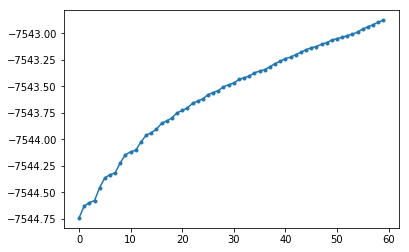

In [17]:
plt.plot([j for i in MM_log_likelihoods_new[0][20:-1] for j in i], marker='.')
plt.show()

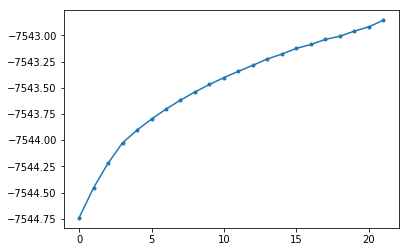

In [18]:
plt.plot([i for i in MM_log_likelihoods_old[0][20:-1]], marker='.')
plt.show()

In [19]:
MM_log_likelihoods_old

[[-7864.485527420475,
  -7751.519848458442,
  -7704.753628510231,
  -7664.92313954653,
  -7633.031393945739,
  -7608.964959221183,
  -7590.975765949104,
  -7578.025838110327,
  -7568.937095401769,
  -7562.408770704364,
  -7557.624215431391,
  -7554.163673194165,
  -7551.723556052253,
  -7549.894876854612,
  -7548.450099661879,
  -7547.357894783552,
  -7546.598602573013,
  -7545.994943231968,
  -7545.506664436216,
  -7545.1068431985,
  -7544.742543664213,
  -7544.455473565602,
  -7544.2208349129205,
  -7544.025705486404,
  -7543.904284149685,
  -7543.798505554188,
  -7543.703643955032,
  -7543.617866898148,
  -7543.539804524946,
  -7543.46838929763,
  -7543.402765359945,
  -7543.3422314583295,
  -7543.2848962758035,
  -7543.2247610252,
  -7543.177970371957,
  -7543.123639303769,
  -7543.08649229182,
  -7543.038036000598,
  -7543.007559776222,
  -7542.958856772796,
  -7542.917714312731,
  -7542.855189322126,
  -7542.855189322126]]

In [20]:
len(para_traj[0])

7

# Check Contour

In [21]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [22]:
pca = PCA(n_components = 2)
pca.fit(para_traj - para_traj[-1])

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [23]:
projectionMat = pca.components_
projectionMat

array([[-0.2349082 , -0.35467718,  0.62668008,  0.48345365, -0.10331764,
        -0.05887538, -0.42240506],
       [ 0.25817587,  0.40810696,  0.36417542,  0.49690164,  0.08185437,
         0.23644878,  0.56978135]])

In [24]:
point  = np.copy(para_traj)

In [25]:
# Contour of the likelihood
step1 = 0.02    # for u (1st principle component)
step2 = 0.02  # for v (2nd principle component)
N1 = 10
N2 = 10
uOffset = - step1 * N1 / 2
vOffset = - step2 * N2 / 2

uValue = np.zeros(N1)
vValue = np.zeros(N2)
Qaux1 = np.zeros((N2, N1))    # Likelihood with ground truth latent
Qaux2 = np.zeros((N2, N1))    # Expected complete data likelihood
Qaux3 = np.zeros((N2, N1))    # Entropy of latent posterior
para_slice = []

for i in range(N1):
    uValue[i] = step1 * (i) + uOffset
    for j in range(N2):
        vValue[j] = step2 * (j) + vOffset

        para_slicePoints = point[-1] + uValue[i] * projectionMat[0] + vValue[j] * projectionMat[1]
        para_slice.append(para_slicePoints)
        para = np.copy(para_slicePoints)
        #print(para)
        
        twobox = twoboxMDP(discount, nq, nr, na, nl, para)
        twobox.setupMDP()
        twobox.solveMDP_sfm()
        ThA = twobox.ThA
        policy = twobox.softpolicy
        pi = np.ones(nq * nq)/ nq /nq  # initialize the estimation of the belief state
        twoboxHMM = HMMtwobox(ThA, policy, pi)
        
        #Qaux1[j, i] = twoboxHMM.likelihood(lat, obs, ThA, policy)  #given latent state
        Qaux2[j, i] = twoboxHMM.computeQaux(obs, ThA, policy) 
        Qaux3[j, i] = twoboxHMM.latent_entr(obs) 

In [26]:
Loglikelihood = Qaux2 + Qaux3

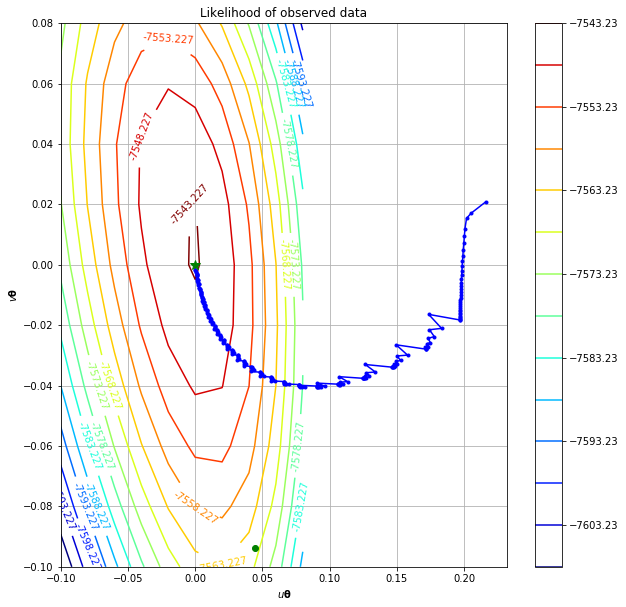

In [27]:
# project the trajectories onto the plane
point_2d = projectionMat.dot((point - point[-1]).T).T   

# true parameters projected onto the plane
true_2d = projectionMat.dot(parameters - point[-1])

fig, ax = plt.subplots(figsize = (10, 10))
uValuemesh, vValuemesh = np.meshgrid(uValue, vValue)
cs3 = plt.contour(uValuemesh, vValuemesh, Loglikelihood, 
                  np.arange(np.min(Loglikelihood), np.max(Loglikelihood), 5), cmap='jet')
#plt.xticks(np.arange(0, 1, 0.1))
#plt.yticks(np.arange(0, 1, 0.1))
plt.plot(point_2d[:, 0], point_2d[:, 1], marker='.', color = 'b')   # projected trajectories
plt.plot(point_2d[-1, 0], point_2d[-1, 1], marker='*', color = 'g', markersize = 10)        # final point
plt.plot(true_2d[0], true_2d[1], marker='o', color = 'g')           # true


ax.grid()
ax.set_title('Likelihood of observed data')
plt.xlabel(r'$u \mathbf{\theta}$', fontsize = 10)
plt.ylabel(r'$v \mathbf{\theta}$', fontsize = 10)
plt.clabel(cs3, inline=1, fontsize=10)
plt.colorbar()
plt.show()

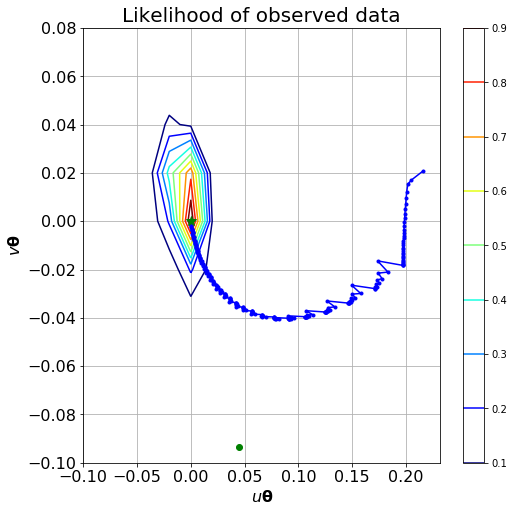

In [28]:
exp_Likelihood = np.exp(Loglikelihood - np.max(Loglikelihood))

fig_contour, ax = plt.subplots(figsize = (8,8))
uValuemesh, vValuemesh = np.meshgrid(uValue, vValue)
cs3 = plt.contour(uValuemesh, vValuemesh, exp_Likelihood, 
                  np.arange(np.min(exp_Likelihood), np.max(exp_Likelihood), 0.1), cmap='jet')
plt.plot(point_2d[:, 0], point_2d[:, 1], marker='.', color = 'b')   # projected trajectories
plt.plot(point_2d[-1, 0], point_2d[-1, 1], marker='*', color = 'g', markersize = 10)        # final point
plt.plot(true_2d[0], true_2d[1], marker='o', color = 'g')           # true


ax.grid()
ax.set_title('Likelihood of observed data', fontsize = 20)
plt.xlabel(r'$u \mathbf{\theta}$', fontsize = 16)
plt.ylabel(r'$v \mathbf{\theta}$', fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
#plt.clabel(cs3, inline=1, fontsize=10)
cb = plt.colorbar()
#cb.ax.set_yticklabels(cb.ax.get_yticklabels(), fontsize=10)
plt.show()

# Check the posterior of the latent states

In [29]:
showlen = 50
showT = range(1000,1000+showlen)

### Based on estimated parameters

In [30]:
para_est = point[-1]
twobox_est = twoboxMDP(discount, nq, nr, na, nl, para_est)
twobox_est.setupMDP()
twobox_est.solveMDP_sfm()
ThA = twobox_est.ThA
policy = twobox_est.softpolicy
pi = np.ones(nq * nq)/ nq /nq  # initialize the estimation of the belief state
twoboxHMM_est = HMMtwobox(ThA, policy, pi)

In [31]:
alpha_est, scale_est = twoboxHMM_est.forward_scale(obs)
beta_est = twoboxHMM_est.backward_scale(obs, scale_est)
gamma_est = twoboxHMM_est.compute_gamma(alpha_est, beta_est)
xi_est = twoboxHMM_est.compute_xi(alpha_est, beta_est, obs)

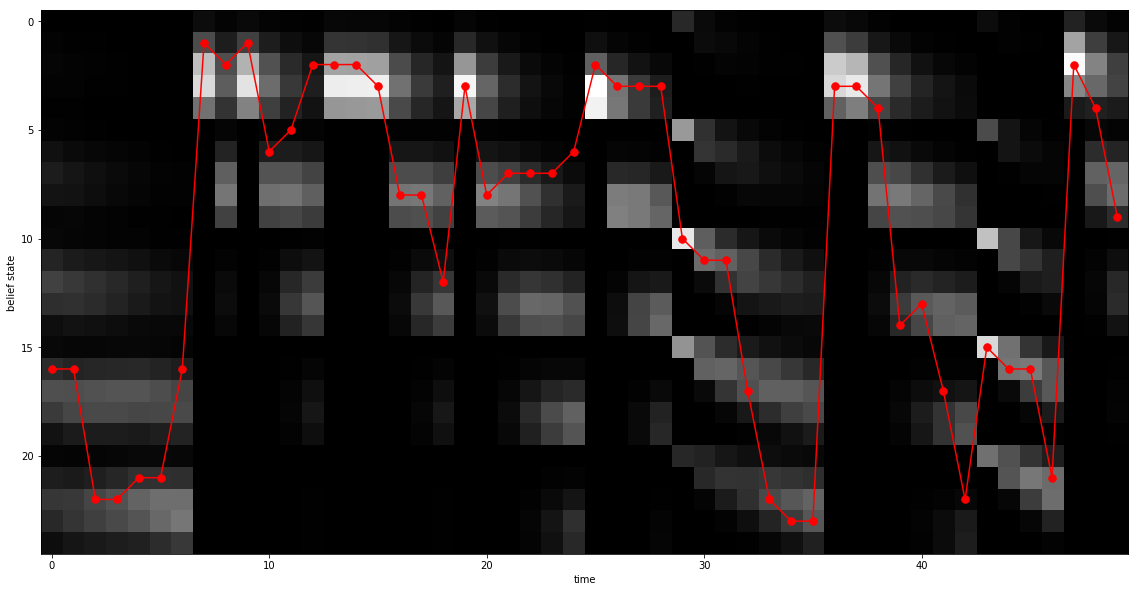

In [32]:
lat_compound = nq * lat[:, 0] + lat[:, 1]

fig, ax = plt.subplots(figsize= (20, 10))
plt.imshow(gamma_est[:, showT], interpolation='Nearest', cmap='gray')
plt.plot(lat_compound[showT], color = 'r',marker ='.', markersize = 15)
plt.xticks(np.arange(0, showlen, 10))
plt.xlabel('time')
plt.ylabel('belief state')

plt.show()

In [33]:
belief1_est = np.sum(np.reshape(gamma_est[:, showT].T, (showlen, nq, nq)), axis = 2)
belief2_est = np.sum(np.reshape(gamma_est[:, showT].T, (showlen, nq, nq)), axis = 1)

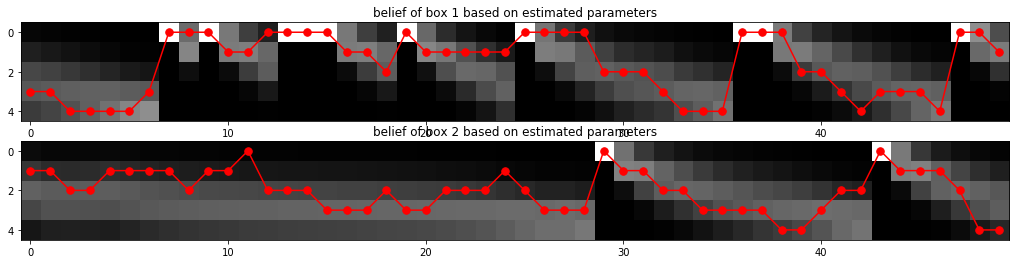

In [34]:
fig = plt.figure(figsize= (20, 4))
ax1 = fig.add_subplot(211)
ax1.imshow(belief1_est.T, interpolation='Nearest', cmap='gray')
ax1.plot(lat[showT, 0], color = 'r',marker ='.', markersize = 15)
ax1.set(title = 'belief of box 1 based on estimated parameters')

ax2 = fig.add_subplot(212)
ax2.imshow(belief2_est.T, interpolation='Nearest', cmap='gray')
ax2.plot(lat[showT, 1], color = 'r',marker ='.', markersize = 15)
ax2.set(title = 'belief of box 2 based on estimated parameters')

plt.show()

### Based on true parameters

In [35]:
para_true = np.copy(parameters)

In [36]:
twobox_true = twoboxMDP(discount, nq, nr, na, nl, para_true)
twobox_true.setupMDP()
twobox_true.solveMDP_sfm()
ThA = twobox_true.ThA
policy = twobox_true.softpolicy
pi = np.ones(nq * nq)/ nq /nq  # initialize the estimation of the belief state
twoboxHMM_true = HMMtwobox(ThA, policy, pi)

In [37]:
alpha_true, scale_true = twoboxHMM_true.forward_scale(obs)
beta_true = twoboxHMM_true.backward_scale(obs, scale_true)
gamma_true = twoboxHMM_true.compute_gamma(alpha_true, beta_true)
xi_true = twoboxHMM_true.compute_xi(alpha_true, beta_true, obs)

In [38]:
belief1_true = np.sum(np.reshape(gamma_true[:, showT].T, (showlen, nq, nq)), axis = 2)
belief2_true = np.sum(np.reshape(gamma_true[:, showT].T, (showlen, nq, nq)), axis = 1)

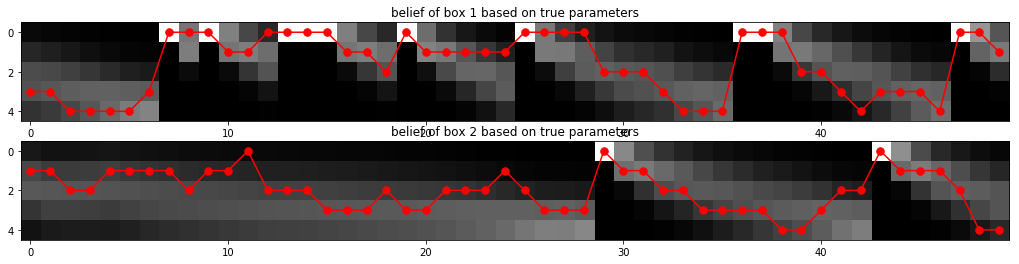

In [39]:
fig = plt.figure(figsize= (20, 4))
ax1 = fig.add_subplot(211)
ax1.imshow(belief1_true.T, interpolation='Nearest', cmap='gray')
ax1.plot(lat[showT, 0], color = 'r',marker ='.', markersize = 15)
ax1.set(title = 'belief of box 1 based on true parameters')

ax2 = fig.add_subplot(212)
ax2.imshow(belief2_true.T, interpolation='Nearest', cmap='gray')
ax2.plot(lat[showT, 1], color = 'r',marker ='.', markersize = 15)
ax2.set(title = 'belief of box 2 based on true parameters')

plt.show()

# Check Hessian

In [40]:
from numpy import linalg as LA

In [41]:
parameters

[0.1, 0.1, 0.01, 0.01, 0.05, 0.2, 0.3]

In [42]:
point[-1]

array([0.10748177, 0.1354343 , 0.00860332, 0.03997915, 0.03784551,
       0.2172343 , 0.40492241])

In [43]:
perturb = 10 ** -6

In [45]:
paraHessian = np.copy(point[-1])

In [47]:
hes = np.zeros((7, 7))

twoboxhes = twoboxMDPder(discount, nq, nr, na, nl, paraHessian)
twoboxhes1st = np.array(twoboxhes.dQauxdpara_sim(obs, paraHessian))

index = range(7)
for i in range(7):
    para_perb = np.copy(paraHessian)
    para_perb[index[i]] += perturb
    twoboxhes_perb = twoboxMDPder(discount, nq, nr, na, nl, para_perb)
        
    twoboxhes1st_pert = np.array(twoboxhes_perb.dQauxdpara_sim(obs, para_perb))
    
    hes[i, :] = (twoboxhes1st_pert - twoboxhes1st) / perturb

In [48]:
hes

array([[-28408.97650458,  13080.3528009 ,  19514.11832124,
         -9078.5761131 ,  12381.86086994,  -1320.58630697,
          4738.46739624],
       [ 13009.41221416, -28912.83656936,  -9444.19298321,
         18955.68857435,  18746.50479294,  -3501.55460183,
          7728.88597567],
       [ 19526.85124706,  -9316.86372496, -15936.16616447,
          6204.57285549,  -5453.33023183,   -287.40032576,
         -1997.25036509],
       [ -9016.73047338,  19050.27602334,   6219.12477072,
        -15719.70642544,  -8927.5999926 ,    827.64017861,
         -3641.6167859 ],
       [ 12383.67985934,  18810.16942207,  -5482.43406229,
         -8978.5316959 , -78875.01851656,  10373.69656842,
        -14662.87358198],
       [ -1275.11157189,  -3468.81279256,   -269.21043172,
           791.26039054,  10362.782632  , -24854.67121005,
          4252.79722549],
       [  4774.84718431,   7754.35182732,  -1971.78451344,
         -3665.26364814, -14644.68368795,   4256.4352043 ,
        -10229.996

In [49]:
delta_para = point[-1] - parameters

In [51]:
-delta_para.dot(hes).dot(delta_para)

65.25515133429585

In [52]:
from datetime import datetime

In [53]:
datestring = datetime.strftime(datetime.now(), '%m%d%Y(%H%M)') 

In [61]:
dataN = np.dstack([obsN, latN, truthN])

### write data to file
data_dict = {'observations': obsN,
             'beliefs': latN,
             'trueStates': truthN,
             'allData': dataN}
data_output = open(datestring + '_dataN_twobox' + '.pkl', 'wb')
pickle.dump(data_dict, data_output)
data_output.close()

### write all model parameters to file
para_dict = {'discount': discount,
             'nq': nq,
             'nr': nr,
             'nl': nl,
             'na': na,
             'foodDrop': 0, 
             #beta,
             'appRate1': gamma1,
             'appRate2': gamma2,
             'disappRate1': epsilon1,
             'disappRate2': epsilon2,
             'consume': 1, 
             #rho,
             'reward': 1,
             'groom': groom,
             'travelCost': travelCost,
             'pushButtonCost': pushButtonCost
             }

# create a file taht saves the parameter dictionary using pickle
para_output = open(datestring + '_para_twobox' + '.pkl', 'wb')
pickle.dump(para_dict, para_output)
para_output.close()

In [62]:
#### Save result data and outputs log

## save the running data
Experiment_dict = {'ParameterTrajectory_Estep': NN_MM_para_old_traj,
                   'ParameterTrajectory_Mstep': NN_MM_para_new_traj,
                   'LogLikelihood_Estep': NN_MM_log_likelihoods_old,
                   'LogLikelihood_Mstep': NN_MM_log_likelihoods_new,
                   'Complete_LogLikelihood_Estep': NN_MM_log_likelihoods_com_old,
                   'Complete_LogLikelihood_Mstep': NN_MM_log_likelihoods_com_new,
                   'Latent_entropies': NN_MM_latent_entropies
                   }
output = open(datestring + '_ExperimentResult' + '.pkl', 'wb')
pickle.dump(Experiment_dict, output)
output.close()
